In [77]:
# import library pandas
import pandas as pd

# Import library scipy
import scipy.stats as st

# Import library numpy
import numpy as np

# Import library datetime
import datetime as dt

# Import Library LinearRegression
from sklearn.linear_model import LinearRegression

# import Module train_test_split digunakan untuk membagi data kita menjadi training dan testing set.
from sklearn.model_selection import train_test_split

# Import Grafphic
import matplotlib.pyplot as plt

In [23]:
# Load Data SUSU 
# link https://github.com/EGraci/UAS_Statistik/blob/main/Tugas%20UAS/susu.xls
df = pd.read_excel('water.xls',  sheet_name="Raw Data")
df

,Month,Value
0,1966-01-01,76.83
1,1966-02-01,77.74
2,1966-03-01,80.47
3,1966-04-01,79.56
4,1966-05-01,82.28
...,...,...
271,1988-08-01,184.60
272,1988-09-01,174.90
273,1988-10-01,161.40
274,1988-11-01,161.40


In [24]:
len(df)

276

In [25]:
df.describe()

,Value
count,276.000000
mean,118.614384
std,26.385234
min,76.830000
25%,98.875000
50%,115.635000
75%,135.075000
max,226.300000


In [26]:
# Data cleaning
value =  []
convert = pd.to_datetime(df['Month'])
convert = df['Month'].map(dt.datetime.toordinal)
for x in convert:
  value.append(x)
df.insert(1, "Time", value, True)

In [27]:
df.head()

,Month,Time,Value
0,1966-01-01,717702,76.83
1,1966-02-01,717733,77.74
2,1966-03-01,717761,80.47
3,1966-04-01,717792,79.56
4,1966-05-01,717822,82.28


In [28]:
df.describe()

,Time,Value
count,276.000000,276.000000
mean,721886.326087,118.614384
std,2429.490207,26.385234
min,717702.000000,76.830000
25%,719793.500000,98.875000
50%,721886.000000,115.635000
75%,723977.750000,135.075000
max,726072.000000,226.300000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   276 non-null    datetime64[ns]
 1   Time    276 non-null    int64         
 2   Value   276 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 6.6 KB


In [30]:
df.corr()

,Time,Value
Time,1.00000,0.83935
Value,0.83935,1.00000


In [31]:
# Data Training
y = np.asarray(df['Value'])
X = df[['Time']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
# Regression Liniear
model = LinearRegression()
model.fit(x_train, y_train)
print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_) 
coefs = zip(model.coef_, X.columns)
model.__dict__
print("sl = %.1f + " % model.intercept_ + " + ".join("%.1f %s" % coef for coef in coefs))

Coefficient:  [0.00898223]
Intercept:  -6365.729183839348
sl = -6365.7 + 0.0 Time


In [33]:
# Score
model.score(x_test, y_test)

0.7200982725086481

Text(0.5, 1.0, 'Date vs Value')

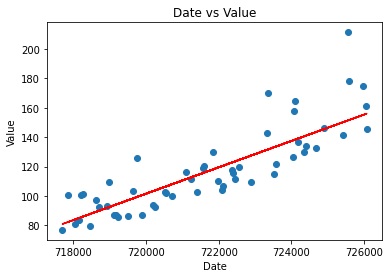

In [34]:
y_prediksi = model.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Date vs Value')

Cooficient = b;
Intercept = a;
Ybar = a + bX;

In [42]:
# Prediksi
tanggal = pd.to_datetime('1/1/1989')
tanggal = dt.datetime.toordinal(tanggal)
model.predict([[tanggal]])

array([156.29693987])

In [43]:
df.head(10)

,Month,Time,Value
0,1966-01-01,717702,76.83
1,1966-02-01,717733,77.74
2,1966-03-01,717761,80.47
3,1966-04-01,717792,79.56
4,1966-05-01,717822,82.28
5,1966-06-01,717853,100.92
6,1966-07-01,717883,113.20
7,1966-08-01,717914,90.92
8,1966-09-01,717945,86.83
9,1966-10-01,717975,82.74


In [81]:
data =  df['Value']
data = data.head(10)
data = data.to_numpy()

array([ 76.83,  77.74,  80.47,  79.56,  82.28, 100.92, 113.2 ,  90.92,
        86.83,  82.74])

In [83]:
# Rata-rata interval 
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 

(78.81006460641919, 95.48793539358084)